In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [5]:
dataset1=pd.read_csv("/content/drive/MyDrive/CSE303/Project/Clear Dataset/insurance.csv")

In [6]:
dataset1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
dataset1.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
dataset1.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [10]:
dataset1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
duplicate = dataset1[dataset1.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
dataset1 = dataset1.drop_duplicates()

In [13]:
duplicate = dataset1[dataset1.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,charges


In [14]:
#droping null values for smoker and creating new column and mapping for numerical
dataset1 = dataset1.dropna(subset=['smoker'])
dataset1['Smoker_Number'] = np.where((dataset1['smoker'] == "yes"), 1, 0)

#creating new column and mapping for numerical
dataset1 = dataset1.drop(dataset1[dataset1['sex'].isin(['Unknown', '?'])].index)
dataset1['Sex_Number'] = np.where((dataset1['sex'] == "male"), 1, 0)

#creating new column and mapping for numerical
dataset1['region_number'] = dataset1['region'].map({
    "southeast": 1,
    "southwest": 2,
    "northeast": 3,
    "northwest": 4,
})

dataset1.head()

,age,sex,bmi,children,smoker,region,charges,Smoker_Number,Sex_Number,region_number
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,2
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1,4
4,32,male,28.880,0,no,northwest,3866.85520,0,1,4


In [15]:
#dropping the categorical column in the new data frame
df2 = dataset1.copy()

df2.drop(columns=['sex','smoker','region',], inplace = True)

df2.head()

,age,bmi,children,charges,Smoker_Number,Sex_Number,region_number
0,19,27.900,0,16884.92400,1,0,2
1,18,33.770,1,1725.55230,0,1,1
2,28,33.000,3,4449.46200,0,1,1
3,33,22.705,0,21984.47061,0,1,4
4,32,28.880,0,3866.85520,0,1,4


In [16]:
missing_value = df2.isnull().mean()* 100
print(missing_value)

age              0.0
bmi              0.0
children         0.0
charges          0.0
Smoker_Number    0.0
Sex_Number       0.0
region_number    0.0
dtype: float64


In [17]:
correlation = df2.corr()
correlation

,age,bmi,children,charges,Smoker_Number,Sex_Number,region_number
age,1.000000,0.109344,0.041536,0.298308,-0.025587,-0.019814,0.006691
bmi,0.109344,1.000000,0.012755,0.198401,0.003746,0.046397,-0.261999
children,0.041536,0.012755,1.000000,0.067389,0.007331,0.017848,0.020206
charges,0.298308,0.198401,0.067389,1.000000,0.787234,0.058044,-0.056070
Smoker_Number,-0.025587,0.003746,0.007331,0.787234,1.000000,0.076596,-0.053454
Sex_Number,-0.019814,0.046397,0.017848,0.058044,0.076596,1.000000,-0.017150
region_number,0.006691,-0.261999,0.020206,-0.056070,-0.053454,-0.017150,1.000000


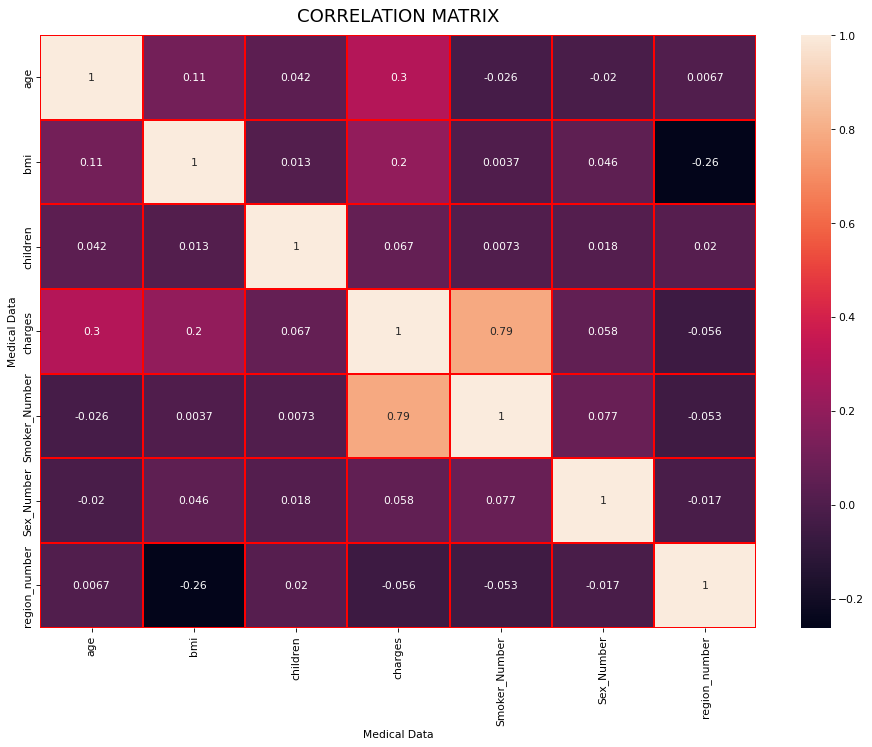

In [18]:
# Visualisation of the corralation table


plt.figure(figsize=(15,10), dpi=77)
sns.heatmap(correlation, linecolor='red',linewidths=0.1, annot=True)

plt.title('Correlation Matrix'.upper(), size=17, pad=13)

plt.xlabel('Medical Data')
plt.ylabel('Medical Data')
plt.xticks(rotation=90)

plt.show()

This correlation matrix displays the relationships between different medical data features. The most significant finding is the strong positive correlation (0.79) between Smoker_Number and charges, indicating that smokers tend to have much higher medical costs. Age and BMI also show a positive relationship with charges, although it is not as strong as smoking.Interestingly, there's a negative correlation (-0.26) between bmi and region_number, suggesting some regional differences in BMI. Most other features, like children and sex, have very weak correlations with the final charges.

Ploting

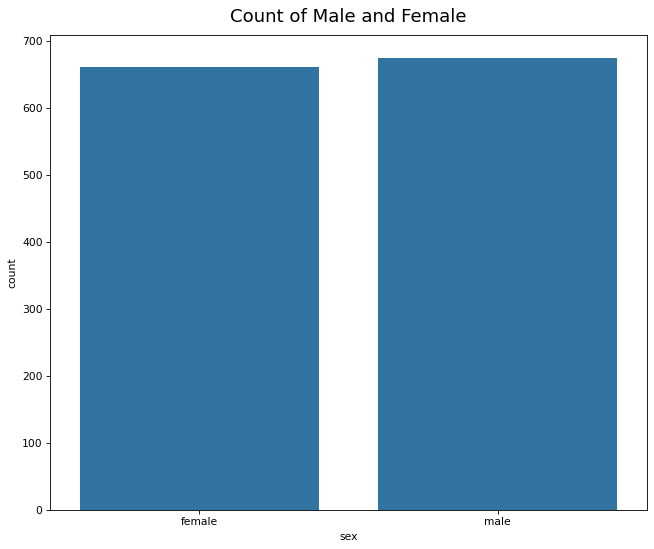

In [19]:
#Count Plot of Male and Female
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=dataset1['sex'],data = dataset1)
plt.title("Count of Male and Female", size=17, pad= 13)
plt.show()

This count plot shows a nearly equal distribution of males and females in the dataset.

Text(0, 0.5, 'Total_Charges')

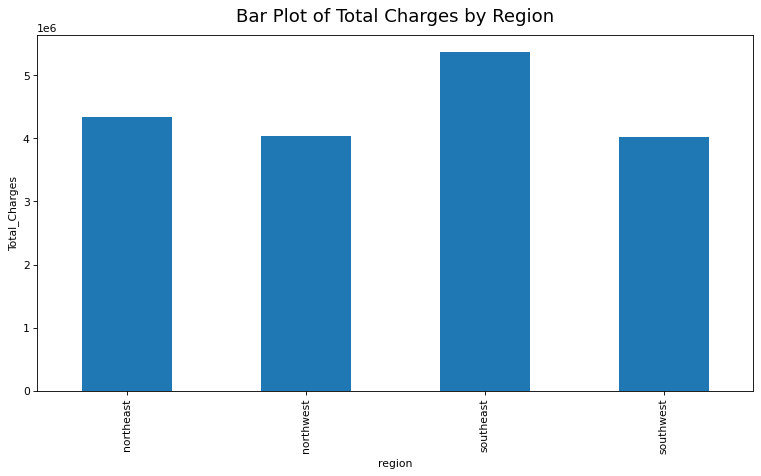

In [20]:
#Bar Plot of Total charges by Region
Total_Sales = dataset1.groupby('region')['charges'].sum()

plt.figure(figsize=(12,6), dpi=77)
Total_Sales.plot(kind='bar')
plt.title("Bar Plot of Total Charges by Region", size=17, pad=13 )


plt.ylabel('Total_Charges')

This bar plot displays the aggregated medical charges across different regions. It highlights that the southeast region incurs the highest total medical costs, exceeding 5 million. The northwest and southwest regions show similar, lower total charges, both around 4 million, suggesting regional disparities in healthcare spending or prevalence of health issues.

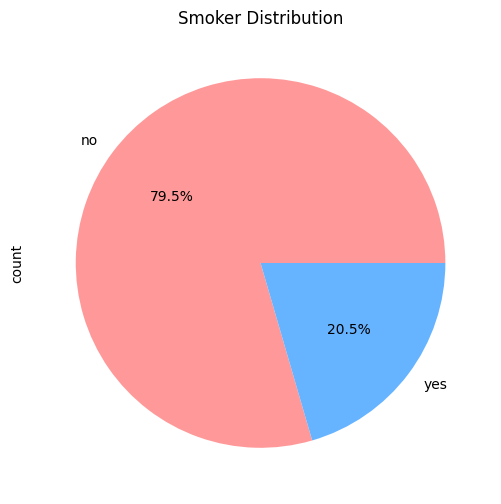

In [21]:
#Pie Chart of distribution of smokers vs non-smokers
dataset1['smoker'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=['#ff9999','#66b3ff'])
plt.title("Smoker Distribution")
plt.show()

The pie chart clearly shows that non-smokers are the dominant group, representing nearly 80% of the dataset.

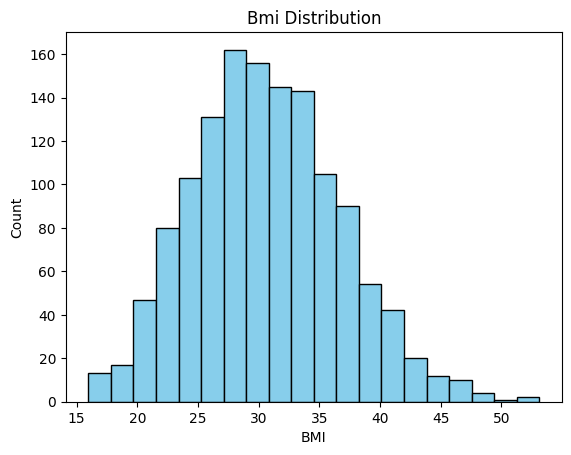

In [22]:
# Histogram of bmi distribution
plt.hist(dataset1['bmi'], bins=20, color='skyblue', edgecolor='black')
plt.title("Bmi Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

This histogram shows a roughly normal distribution for BMI, with the most frequent values concentrated around 30.

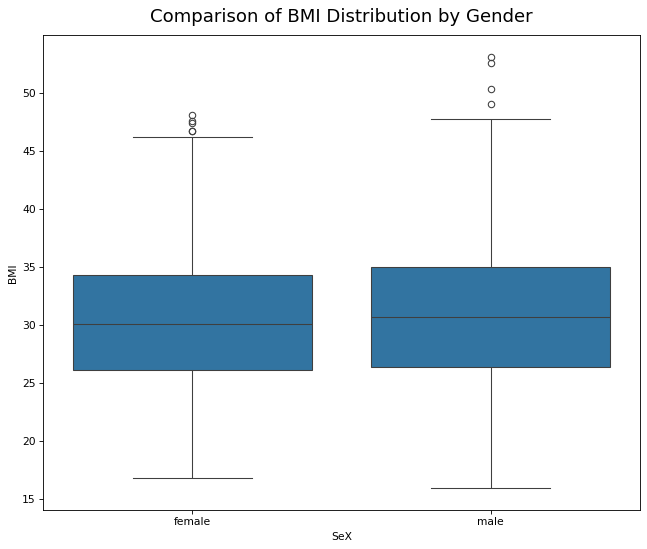

In [23]:
# Age comparision of BMI
plt.figure(figsize=(10, 8), dpi=77)
sns.boxplot(x="sex", y="bmi", data=dataset1)

plt.title("Comparison of BMI Distribution by Gender", size=17, pad=13)
plt.ylabel("BMI")
plt.xlabel("SeX")
plt.show()

This boxplot compares the BMI distributions for males and females, showing very similar median values and interquartile ranges, which suggests no significant difference in typical BMI between the two genders. However, the outliers for males extend to slightly higher BMI values compared to females.


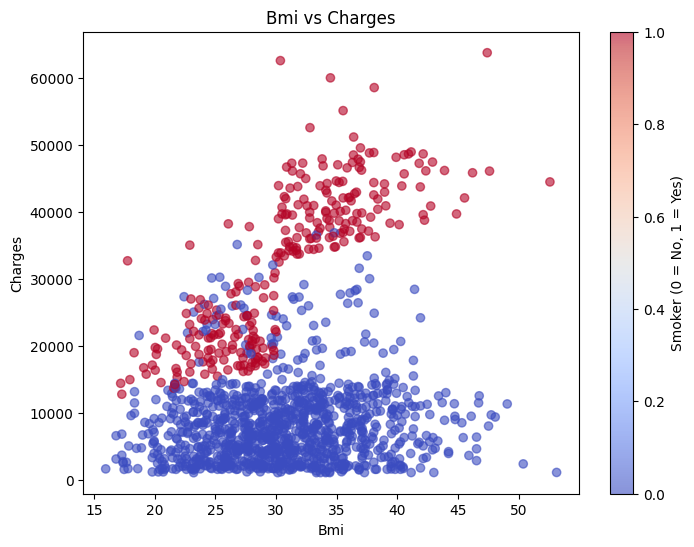

In [24]:
#Scatter plot Bmi vs Charges
color_map = dataset1['smoker'].map({'yes': 1, 'no': 0})

plt.figure(figsize=(8, 6))
plt.scatter(dataset1['bmi'], dataset1['charges'], c=color_map, cmap='coolwarm', alpha=0.6)
plt.title('Bmi vs Charges')
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.colorbar(label='Smoker (0 = No, 1 = Yes)')
plt.show()

This scatter plot reveals a clear distinction in medical charges based on smoking status. Non-smokers (blue dots) generally have lower costs, forming a dense cluster at the bottom of the graph. In contrast, smokers (red dots) face significantly higher charges, with a noticeable positive trend where costs increase with BMI.

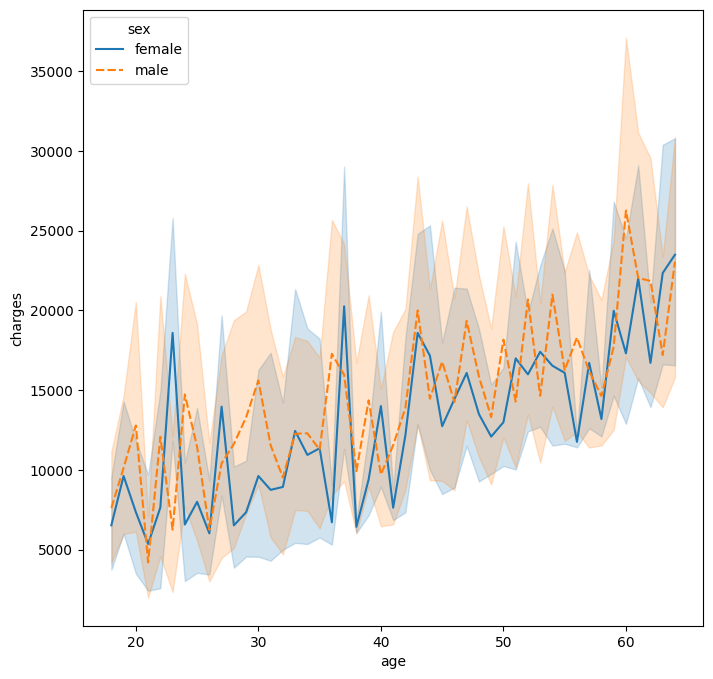

In [25]:
plt.figure(figsize=(8,8))
sns.lineplot(x="age", y="charges", hue="sex", style="sex", data=dataset1)
plt.show()

This line plot illustrates a clear positive trend where medical charges generally increase with age for both males and females. Despite the overall upward slope, the significant fluctuations and overlapping shaded areas suggest high variability and no consistent difference in charges between the sexes.

Running the Model

In [26]:
#Dividing column for model
x1 = df2.drop(columns = ['charges'])
y1 = df2['charges']

In [27]:
#declaring and initializing
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

print(x1_train)
print(y1_train)

print(x1_test)
print(y1_test)

      age     bmi  children  Smoker_Number  Sex_Number  region_number
1114   23  24.510         0              0           1              3
968    21  25.745         2              0           1              3
599    52  37.525         2              0           0              4
170    63  41.470         0              0           1              1
275    47  26.600         2              0           0              3
...   ...     ...       ...            ...         ...            ...
1096   51  34.960         2              1           0              3
1131   27  45.900         2              0           1              2
1295   20  22.000         1              0           1              2
861    38  28.000         3              0           0              2
1127   35  35.860         2              0           0              1

[1069 rows x 6 columns]
1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
           ...     
1096    44641.1

In [28]:
missing_value = df2.isnull().mean()* 100
print(missing_value)

age              0.0
bmi              0.0
children         0.0
charges          0.0
Smoker_Number    0.0
Sex_Number       0.0
region_number    0.0
dtype: float64


In [33]:
#Creating Model
lr1 = LinearRegression()
lr1.fit(x1_train, y1_train)
lr1_pred = lr1.predict(x1_test)

#LR Error
lr_mae = mean_absolute_error(y1_test, lr1_pred)
lr_mse = mean_squared_error(y1_test, lr1_pred)
lr_rmse = np.sqrt(mean_squared_error(y1_test, lr1_pred))

mean_target = np.mean(y1_test)
mae_percent = (lr_mae / mean_target) * 100
rmse_percent = (lr_rmse / mean_target) * 100

print("Mean of target (medical cost):", mean_target)


print('MAE Linear Regression: ', lr_mae)
print("MAE as % of mean target:", mae_percent)

print('MSE Linear Regression: ', lr_mse)

print('RMSE Linear Regression: ', lr_rmse)
print("RMSE as % of mean target:", rmse_percent)

print("R2 Score:", r2_score(y1_test, lr1_pred))

Mean of target (medical cost): 14272.007559287313
MAE Linear Regression:  4181.347606911925
MAE as % of mean target: 29.297543387236864
MSE Linear Regression:  35604894.06639001
RMSE Linear Regression:  5966.98366567146
RMSE as % of mean target: 41.809000176632665
R2 Score: 0.8062382634707145


This model shows, the average medical cost for a person in this dataset is about $14,272. This gives us a baseline to compare our model's errors against.
On average, our model's predictions are off by about $4,181. This is the typical absolute difference between the predicted and actual costs.
This error of $4,181 is about 29.3% of the average medical cost, which helps put the error into perspective.
This is the Mean Squared Error. It's a large number because it squares the differences, penalizing bigger mistakes much more heavily.
The Root Mean Squared Error is about $5,967. It's higher than the MAE because it's more sensitive to a few very inaccurate predictions. This error represents about 41.8% of the average medical cost, showing the impact of those larger prediction errors.
The R² score of 0.806 is quite good. It means our model can explain about 80.6% of the variation in medical costs based on the features we used.

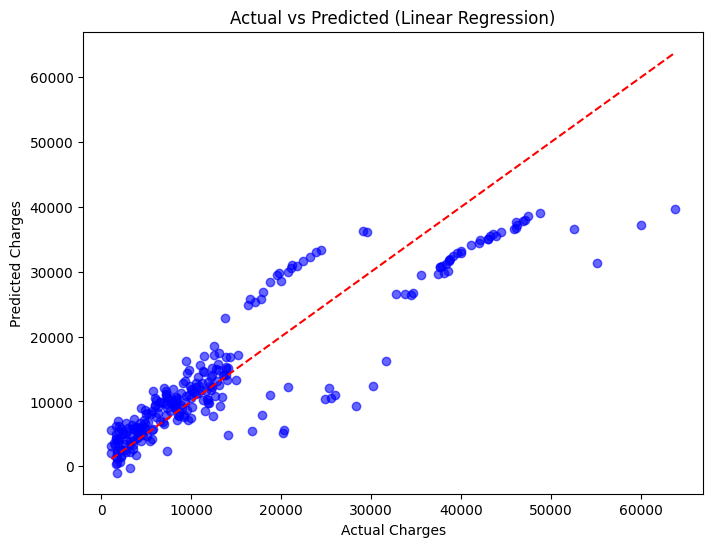

In [34]:
# --- 2. Actual vs Predicted Plot ---
plt.figure(figsize=(8,6))
plt.scatter(y1_test, lr1_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted (Linear Regression)")
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'r--')
plt.show()

This scatter plot visualizes the linear regression model's performance by plotting predicted charges against the actual charges. While the predictions for lower-cost individuals (From nearly 0 to 15000) are clustered relatively close to the ideal diagonal line, the model's accuracy diminishes for higher charges. The increasing spread of points indicates that the model struggles to predict high medical expenses accurately, often underestimating them.

In [35]:
#Decision Tree Model
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(x1_train, y1_train)

y_pred = model.predict(x1_test)

mae = mean_absolute_error(y1_test, y_pred)

m = mean_squared_error(y1_test, y_pred)
rmse = np.sqrt(m)
mae_percent = (mae / mean_target) * 100
rmse_percent = (rmse / mean_target) * 100

print("Mean of target (medical cost):", mean_target)

print("MAE:", mae)
print("MAE as % of mean target:", mae_percent)

print("MSE:", mean_squared_error(y1_test, y_pred))

print("RMSE:", rmse)
print("RMSE as % of mean target:", rmse_percent)

print("R2 Score:", r2_score(y1_test, y_pred))

Mean of target (medical cost): 14272.007559287313
MAE: 2591.6682494256397
MAE as % of mean target: 18.159100873928192
MSE: 18722739.93515944
RMSE: 4326.978152840553
RMSE as % of mean target: 30.31793624594062
R2 Score: 0.8981109002695451


This Decision Tree model show the average medical cost in our test data is about $14,272. This is the baseline we're trying to predict. On average, our Decision Tree model's predictions are about $2,592. This error is roughly 18.2% of the average cost, which shows a significant improvement over the previous model. This is the Mean Squared Error, which is a large number because it heavily penalizes bigger prediction mistakes. The Root Mean Squared Error is about $4,327. It's higher than the MAE, suggesting there are still some larger prediction errors. This larger error represents about 30.3% of the average cost, but it's still a much better score than the linear model. The R² Score is excellent at nearly 0.90 (or 90%), meaning the model explains about 90% of the variation in medical costs and is a very strong fit.